In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [40]:
full = pd.read_csv('big-data-derby-2022/nyra_2019_complete.csv', header = None)
full.columns = ['track_id', 'race_date', 'race_number', 'program_number', 'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type', 'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time', 'weight_carried', 'jockey', 'odds', 'position_at_finish']
full.head()

/var/folders/jg/6trrgcbd7s94jnb11pjg88rr0000gn/T/ipykernel_96125/1589829724.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv('big-data-derby-2022/nyra_2019_complete.csv', header = None)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [41]:
data = pd.DataFrame(full)
data.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [42]:
data_joel = data[data['jockey'] == 'Joel Rosario']  
data_joel_drop = data_joel.drop_duplicates(subset=['race_number'])
data_joel_drop

data_eric = data[data['jockey'] == 'Eric Cancel']  
data_eric_drop = data_eric.drop_duplicates(subset=['race_number'])

data_manuel = data[data['jockey'] == 'Manuel Franco'] 
data_manuel_drop = data_manuel.drop_duplicates(subset=['race_number'])

data_dylan = data[data['jockey'] == 'Dylan Davis'] 
data_dylan_drop = data_dylan.drop_duplicates(subset=['race_number'])

data_reylu = data[data['jockey'] == 'Reylu Gutierrez']  
data_reylu_drop = data_reylu.drop_duplicates(subset=['race_number'])


data_reduced = pd.concat([data_joel_drop, data_eric_drop, data_manuel_drop, data_dylan_drop, data_reylu_drop], ignore_index=True, sort=False)

data_reduced = data_reduced.drop(columns = ['race_date','latitude', 'longitude', 'trakus_index', 'program_number', 'distance_id', 'run_up_distance', 'purse', 'post_time', 'odds'])
data_reduced

# Top Importance: 0(track_id), 1(race_date), 2(race_number), 5(course_type), 6(track_condition) 8(race_type), 11(weight), 12(jockey)

,track_id,race_number,course_type,track_condition,race_type,weight_carried,jockey,position_at_finish
0,BEL,6,T,GD,CLM,124,Joel Rosario,8
1,BEL,7,D,FT,CLM,122,Joel Rosario,5
2,BEL,3,D,FT,CLM,124,Joel Rosario,5
3,BEL,1,D,SY,CLM,123,Joel Rosario,1
4,BEL,9,D,SY,CLM,124,Joel Rosario,3
...,...,...,...,...,...,...,...,...
57,AQU,9,D,FT,CLM,116,Reylu Gutierrez,2
58,AQU,6,D,FT,CLM,117,Reylu Gutierrez,4
59,AQU,10,D,FT,CLM,117,Reylu Gutierrez,7
60,BEL,11,D,SY,STK,116,Reylu Gutierrez,4


In [43]:
from sklearn.preprocessing import LabelEncoder


def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

Encoder(data_reduced)



,track_id,race_number,course_type,track_condition,race_type,weight_carried,jockey,position_at_finish
0,1,6,3,2,2,124,2,8
1,1,7,0,1,2,122,2,5
2,1,3,0,1,2,124,2,5
3,1,1,0,4,2,123,2,1
4,1,9,0,4,2,124,2,3
...,...,...,...,...,...,...,...,...
57,0,9,0,1,2,116,4,2
58,0,6,0,1,2,117,4,4
59,0,10,0,1,2,117,4,7
60,1,11,0,4,6,116,4,4


In [44]:
X = data_reduced.values[:, :7]  
y = data_reduced.values[:, 7]   

In [74]:
print(X)

[[  1.   6.   3.   2.   2. 124.   2.]
 [  1.   7.   0.   1.   2. 122.   2.]
 [  1.   3.   0.   1.   2. 124.   2.]
 [  1.   1.   0.   4.   2. 123.   2.]
 [  1.   9.   0.   4.   2. 124.   2.]
 [  1.   8.   3.   2.   1. 121.   2.]
 [  2.   4.   0.   1.   1. 120.   2.]
 [  0.   5.   0.   2.   2. 124.   2.]
 [  0.  10.   0.   1.   6. 120.   2.]
 [  1.   2.   0.   1.   7. 123.   2.]
 [  1.  13.   0.   1.   6. 121.   2.]
 [  1.  11.   3.   0.   4. 125.   2.]
 [  1.  12.   1.   0.   1. 122.   2.]
 [  0.   4.   0.   1.   2. 122.   1.]
 [  0.   9.   0.   1.   2. 121.   1.]
 [  0.   5.   0.   1.   2. 119.   1.]
 [  0.   3.   0.   1.   2. 121.   1.]
 [  0.   2.   0.   3.   1. 123.   1.]
 [  0.   7.   0.   1.   2. 121.   1.]
 [  1.   6.   1.   0.   2. 125.   1.]
 [  1.  10.   1.   0.   1. 121.   1.]
 [  0.   8.   0.   1.   1. 119.   1.]
 [  1.   1.   0.   2.   2. 123.   1.]
 [  2.  11.   0.   4.   0. 124.   1.]
 [  1.  12.   0.   4.   3. 118.   1.]
 [  0.   7.   2.   0.   2. 120.   3.]
 [  1.   6. 

In [45]:
X = (X - X.min() / (X.max() - X.min()))

In [46]:
for i in range(5):
    print('X =', X[i], ', y =', y[i])

X = [  1.   6.   3.   2.   2. 124.   2.] , y = 8
X = [  1.   7.   0.   1.   2. 122.   2.] , y = 5
X = [  1.   3.   0.   1.   2. 124.   2.] , y = 5
X = [  1.   1.   0.   4.   2. 123.   2.] , y = 1
X = [  1.   9.   0.   4.   2. 124.   2.] , y = 3


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
 model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_test, y_test) 

-0.42407689303755314

In [28]:
# "In scientific studies, the R-squared may need to be above 0.95 for a regression model to be considered reliable. 
# In other domains, an R-squared of just 0.3 may be sufficient if there is extreme variability in the dataset." 

# R2 0.3 - 0.5 is moderate. 
# R2 <0.3 is weak



In [50]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature: 0, Score: 0.34719
Feature: 1, Score: 0.24381
Feature: 2, Score: 0.63007
Feature: 3, Score: 0.02348
Feature: 4, Score: -0.30424
Feature: 5, Score: -0.19676
Feature: 6, Score: -0.03057


In [78]:
Xnew = [[0, 9, 2, 3, 1, 123, 2]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

X=[[0, 9, 2, 3, 1, 123, 2]], Predicted=[5.52795815]


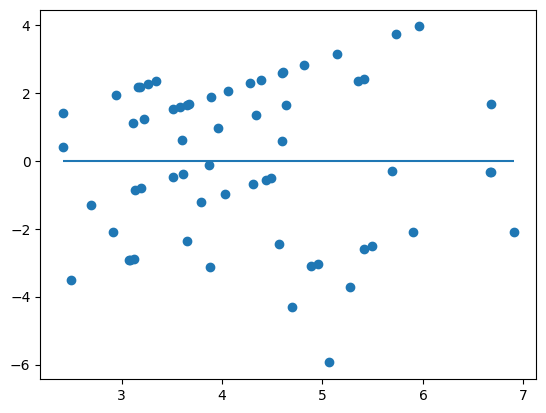

In [29]:
# predictions = model.predict(X)
# # Plot Residuals
# # plt.scatter(predictions, predictions - y)
# plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
# plt.show()